# Imports

In [1]:
import numpy as np
np.random.seed(2)
import random
random.seed(1)

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import KFold
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.metrics import mean_squared_error

In [4]:
if not os.path.exists('results'):
    os.makedirs('results')

# Passive Aggressive Regressor

In [5]:
clf = PassiveAggressiveRegressor(random_state=2)
clf

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


PassiveAggressiveRegressor(C=1.0, average=False, epsilon=0.1,
              fit_intercept=True, loss='epsilon_insensitive', max_iter=5,
              n_iter=None, random_state=2, shuffle=True, tol=None,
              verbose=0, warm_start=False)

In [6]:
train = pd.read_csv('../feature_engineering/train.gz')
X_train = train[train.columns[:-1]].values
y_train = train[train.columns[-1]].values

In [7]:
test = pd.read_csv('../feature_engineering/test.gz')
X_test = test[test.columns[:-1]].values
y_test = test[test.columns[-1]].values

## Grid Search

In [8]:
cv = KFold(n_splits=3, shuffle=True, random_state=2)
cv

KFold(n_splits=3, random_state=2, shuffle=True)

In [9]:
params = {
    "C": [0.001, 0.1, 1, 10, 100],
    "fit_intercept": [False],
}

In [10]:
grid = EvolutionaryAlgorithmSearchCV(
    estimator=clf, 
    params=params, 
    cv=cv, 
    scoring='neg_mean_squared_error',
    n_jobs=4, 
    population_size=10,
    gene_mutation_prob=0.10,
    gene_crossover_prob=0.5,
    tournament_size=3,
    generations_number=15,
    verbose=1,
)
grid

EvolutionaryAlgorithmSearchCV(cv=KFold(n_splits=3, random_state=2, shuffle=True),
               error_score='raise',
               estimator=PassiveAggressiveRegressor(C=1.0, average=False, epsilon=0.1,
              fit_intercept=True, loss='epsilon_insensitive', max_iter=5,
              n_iter=None, random_state=2, shuffle=True, tol=None,
              verbose=0, warm_start=False),
               fit_params={}, gene_crossover_prob=0.5,
               gene_mutation_prob=0.1, gene_type=None,
               generations_number=15, iid=True, n_jobs=4,
               params={'C': [0.001, 0.1, 1, 10, 100], 'fit_intercept': [False]},
               population_size=10, refit=True,
               scoring='neg_mean_squared_error', tournament_size=3,
               verbose=1)

In [11]:
_ = grid.fit(X_train, y_train)

Types [2, 1] and maxint [4, 0] detected
--- Evolve in 5 possible combinations ---
gen	nevals	avg     	min     	max     	std
0  	10    	-218.152	-218.152	-218.152	0  
1  	5     	-218.152	-218.152	-218.152	0  
2  	4     	-218.152	-218.152	-218.152	0  
3  	6     	-218.152	-218.152	-218.152	0  
4  	8     	-218.152	-218.152	-218.152	0  
5  	7     	-218.152	-218.152	-218.152	0  
6  	7     	-218.152	-218.152	-218.152	0  
7  	7     	-218.152	-218.152	-218.152	0  
8  	3     	-218.152	-218.152	-218.152	0  
9  	7     	-218.152	-218.152	-218.152	0  
10 	2     	-218.152	-218.152	-218.152	0  
11 	10    	-218.152	-218.152	-218.152	0  
12 	7     	-218.152	-218.152	-218.152	0  
13 	7     	-218.152	-218.152	-218.152	0  
14 	5     	-218.152	-218.152	-218.152	0  
15 	5     	-218.152	-218.152	-218.152	0  
Best individual is: {'C': 0.1, 'fit_intercept': False}
with fitness: -218.15153979797938


In [12]:
best = pd.Series(grid.best_params_)
best.to_csv('results/pagg-params.csv')
best

C                  0.1
fit_intercept    False
dtype: object

In [13]:
results = grid.cv_results_
df = pd.DataFrame(results)
df.to_csv('results/pagg-grid.csv')
df

,index,max_test_score,mean_test_score,min_test_score,nan_test_score?,param_index,params,std_test_score
0,11,-218.15154,-218.15154,-218.15154,False,0,"{'C': 10, 'fit_intercept': False}",0.0
1,12,-218.15154,-218.15154,-218.15154,False,0,"{'C': 0.1, 'fit_intercept': False}",0.0
2,13,-218.15154,-218.15154,-218.15154,False,0,"{'C': 100, 'fit_intercept': False}",0.0
3,14,-218.15154,-218.15154,-218.15154,False,0,"{'C': 10, 'fit_intercept': False}",0.0
4,15,-218.15154,-218.15154,-218.15154,False,0,"{'C': 0.1, 'fit_intercept': False}",0.0
5,17,-218.15154,-218.15154,-218.15154,False,0,"{'C': 10, 'fit_intercept': False}",0.0
6,18,-218.15154,-218.15154,-218.15154,False,0,"{'C': 10, 'fit_intercept': False}",0.0
7,19,-218.15154,-218.15154,-218.15154,False,0,"{'C': 1, 'fit_intercept': False}",0.0
8,20,-218.15154,-218.15154,-218.15154,False,0,"{'C': 1, 'fit_intercept': False}",0.0
9,22,-218.15154,-218.15154,-218.15154,False,0,"{'C': 1, 'fit_intercept': False}",0.0


# Testing

In [14]:
clf = PassiveAggressiveRegressor(**grid.best_params_)
clf

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


PassiveAggressiveRegressor(C=0.1, average=False, epsilon=0.1,
              fit_intercept=False, loss='epsilon_insensitive', max_iter=5,
              n_iter=None, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)

In [15]:
clf.fit(X_train, y_train)

PassiveAggressiveRegressor(C=0.1, average=False, epsilon=0.1,
              fit_intercept=False, loss='epsilon_insensitive', max_iter=5,
              n_iter=None, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)

## Training Accuracy

In [16]:
train_pred = clf.predict(X_train)

In [17]:
train_err = mean_squared_error(y_train, train_pred)
train_err

161.19873497022863

In [18]:
train_df = pd.DataFrame([y_train, train_pred], index=['Truth', 'Predictions']).T

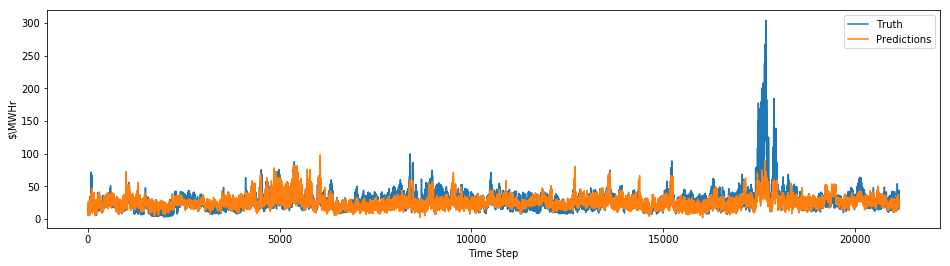

In [19]:
ax = train_df.plot(figsize=(16, 4))
ax.set_ylabel('$\MWHr')
ax.set_xlabel('Time Step')
plt.savefig('results/pagg-train.pdf')
plt.savefig('results/pagg-train.svg')

## Testing Accuracy

In [20]:
test_pred = clf.predict(X_test)

In [21]:
test_err = mean_squared_error(y_test, test_pred)
test_err

64.28967145938725

In [22]:
test_df = pd.DataFrame([y_test, test_pred], index=['Truth', 'Predictions']).T

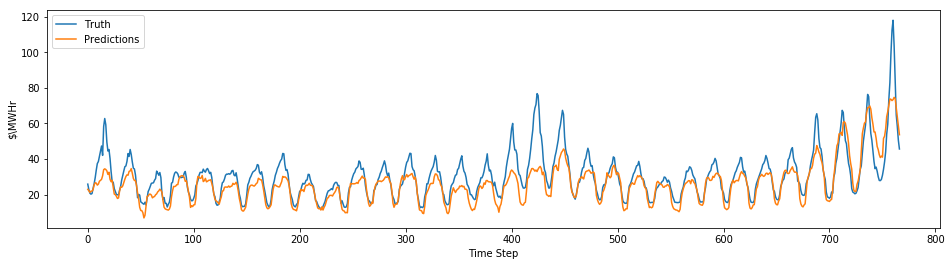

In [23]:
ax = test_df.plot(figsize=(16, 4))
ax.set_ylabel('$\MWHr')
ax.set_xlabel('Time Step')
plt.savefig('results/pagg-test.pdf')
plt.savefig('results/pagg-test.svg')

## Results

In [24]:
results = pd.Series([train_err, test_err], index=['Train', 'Test'])
results

Train    161.198735
Test      64.289671
dtype: float64

In [25]:
results.to_csv('results/pagg-mse.csv')